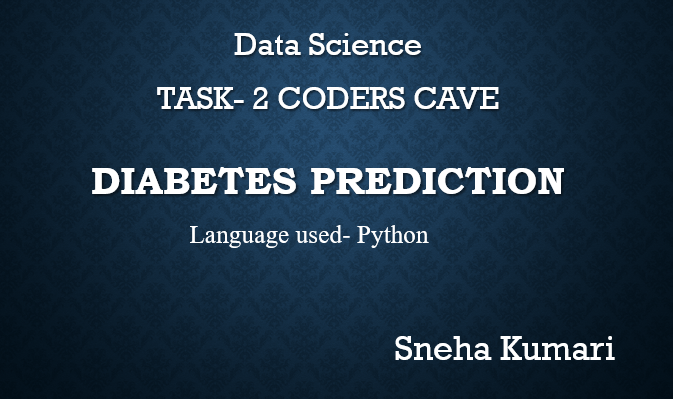

In [1]:
from IPython import display
display.Image("CVE.png")

In [2]:
#Import all required lib
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score


In [3]:
#Load the dataset fro diabetes prediction
df=pd.read_csv("diabetes.csv")

In [4]:
#Read 5 top row dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Check for 5 last row dataset
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
#Check the dimension of dataset
df.shape

(768, 9)

DATA PREPROCESSING

In [7]:
#Check for Null vales
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Check for info dataset
df.info()

#This show the datatype & non null value of each column  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Check for Duplicated Values
df.duplicated().sum()

0

In [10]:
#Check the relation between variables
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


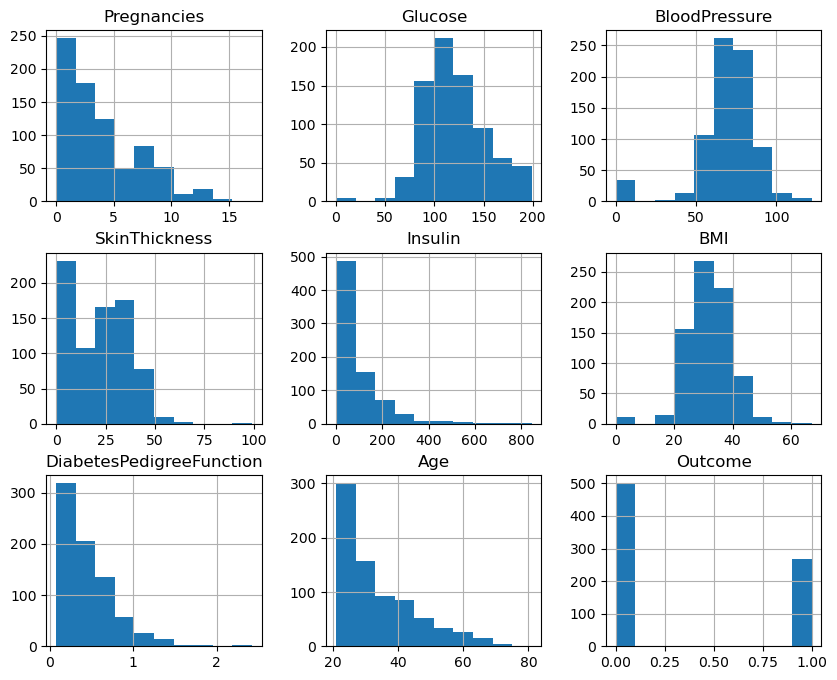

In [11]:
#Now check for some of viualization in count values of each feature
df.hist(figsize=(10,8))
plt.show()

<Axes: >

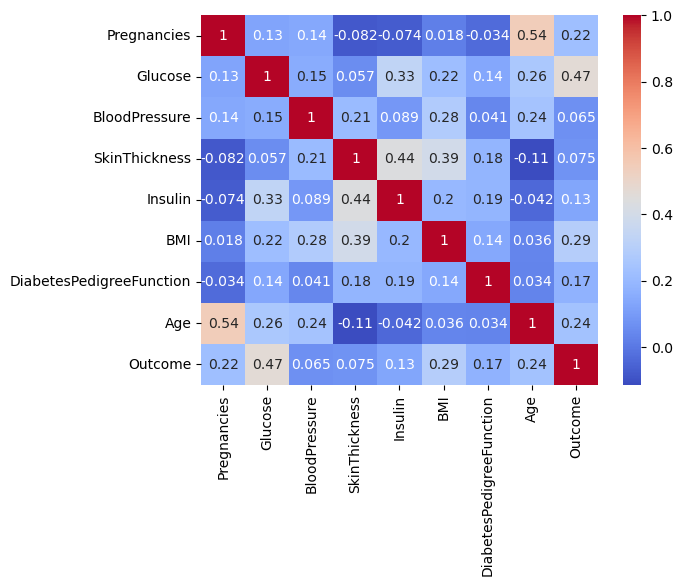

In [12]:
# check the correlation map
correlation_matrix = df.corr()
sea.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

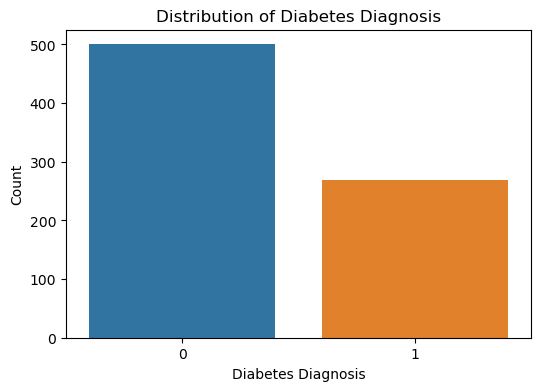

In [13]:
#check for the Distribution of Diabetes Diagonsis

plt.figure(figsize=(6, 4))
sea.countplot(x="Outcome", data=df)
plt.title("Distribution of Diabetes Diagnosis")
plt.xlabel("Diabetes Diagnosis")
plt.ylabel("Count")
plt.show()

<Axes: >

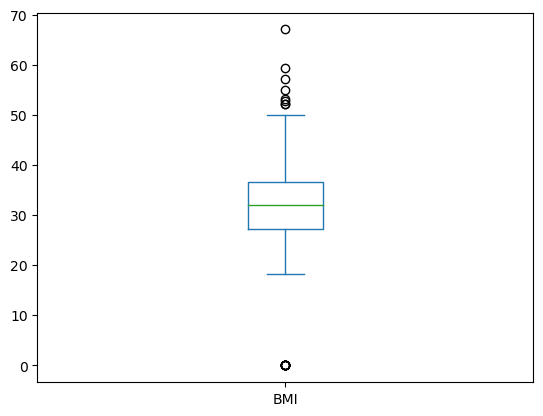

In [14]:
#Check for outlier in Box plot 
df.BMI.plot.box()

array([<Axes: ylabel='Outcome'>], dtype=object)

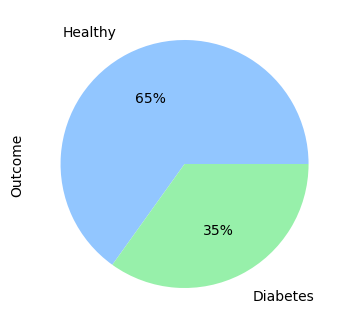

In [15]:
import matplotlib.style as style
style.available
style.use('seaborn-pastel')
labels=['Healthy','Diabetes']
df['Outcome'].value_counts().plot(kind='pie',labels=labels,subplots=True,autopct='%1.0f%%',labeldistance=1.2,figsize=(4,5))


Text(0.5, 0, 'SkinThickness')

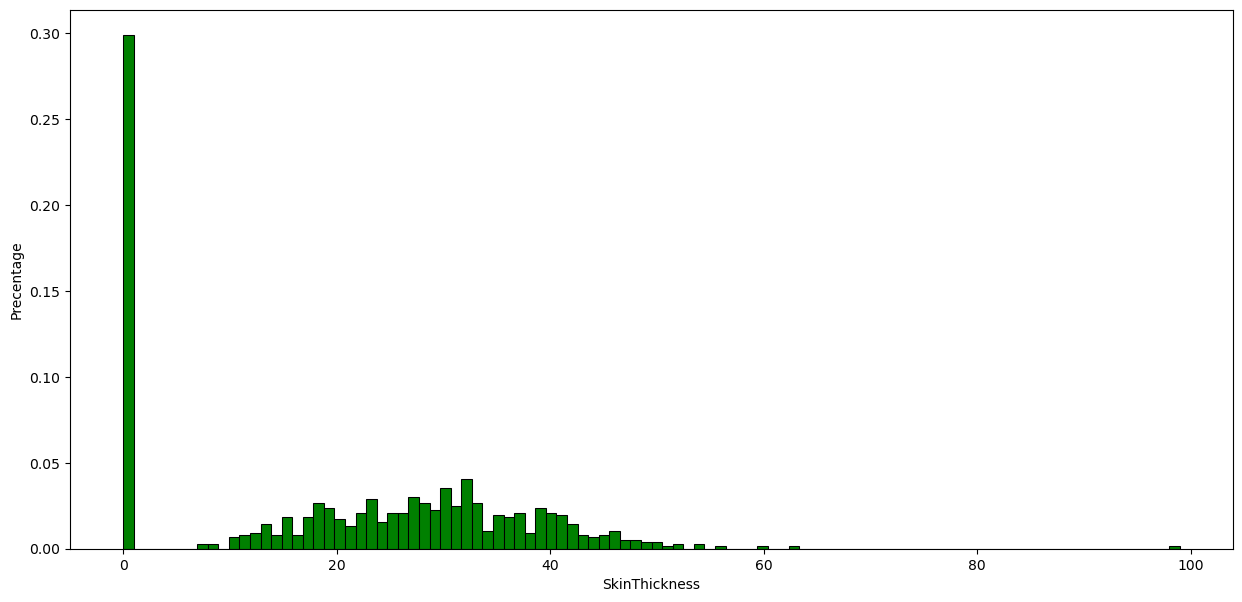

In [16]:
# check for Skin Thickness EDA
plt.figure(figsize=(15,7))
sea.histplot(df['SkinThickness'], facecolor='green',bins=100,stat='density')
plt.ylabel('Precentage')
plt.xlabel('SkinThickness')

<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>

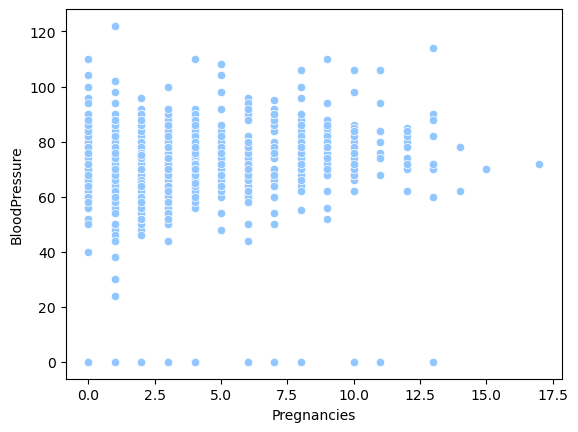

In [17]:
# Check the relation between Pregnancie & BloodPressure
sea.scatterplot(data=df,x='Pregnancies',y='BloodPressure')

In [18]:
#Build the model for prediction

So, here firstly we ll divide the dataset into train and test split and assing the X & Y 

In [19]:
x=df.drop('Outcome',axis=1) #Feature
y=df.Outcome   #Target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [21]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [22]:
X_test.shape,y_test.shape


((154, 8), (154,))

In [23]:
# Classification Algorithms- KNN, Naive Bayes,SVM,Decision Tree,Random Forest,Logistic Regression

so, here we ll perform DECISION TREE, RANDOM FOREST, LOGISTIC REGRESSION to predict the diabetics prediction

In [24]:
#Train the model
model =  DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Accuracy: 0.7467532467532467


So, for decision tree we have 74 percent accuracy, similarly
we performed for random forest and logistic regression

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)
print("Accuracy:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Accuracy: 0.7207792207792207


In [30]:
reg = LogisticRegression()
reg.fit(X_train,y_train)    

LogisticRegression()

In [31]:

lr_pred=reg.predict(X_test)

In [32]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


 F1:
 0.6548672566371682


In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
# Make predictions (lets take random data from datset n predict the outcome)
new_data = pd.DataFrame({
    'Pregnancies': [8],
    'Glucose': [183],
    'BloodPressure': [64],
    'SkinThickness': [0],
    'Insulin': [0],
    'BMI': [23.3],
    'DiabetesPedigreeFunction': [0.672],
    'Age': [32],
})

predicted_price = model.predict(new_data)

print("Predicted outcome:", predicted_price)

Predicted outcome: [1]
